In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

### **Importing Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid - 19 Data Analysis/Covid_19_DataSet.csv')

In [ ]:
data.head(10)

,Age Group,Country/Region,Continent,Population,Condition Group,Condition,ICD10_codes,Vaccination Relevant,TotalCases,NewCases,...,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,Flag
0,0-24,USA,North America,3.311981e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,5032179,NaN,...,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA,NaN
1,25-34,Brazil,South America,2.127107e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2917562,NaN,...,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA,Counts less than 10 suppressed.
2,35-44,India,Asia,1.381345e+09,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2025409,NaN,...,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,NaN
3,45-54,Russia,Europe,1.459409e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,871894,NaN,...,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS,Counts less than 10 suppressed.
4,55-64,South Africa,Africa,5.938157e+07,Respiratory diseases,Influenza and pneumonia,J09-J18,No,538184,NaN,...,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF,Counts less than 10 suppressed.
5,65-74,Mexico,North America,1.290662e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,No,462690,6590.0,...,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas,MEX,Counts less than 10 suppressed.
6,75-84,Peru,South America,3.301632e+07,Respiratory diseases,Influenza and pneumonia,J09-J18,No,455409,NaN,...,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas,PER,NaN
7,85+,Chile,South America,1.913251e+07,Respiratory diseases,Influenza and pneumonia,J09-J18,No,366671,NaN,...,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas,CHL,NaN
8,Not stated,Colombia,South America,5.093626e+07,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,357710,NaN,...,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas,COL,NaN
9,All ages,Spain,Europe,4.675665e+07,Respiratory diseases,Influenza and pneumonia,J09-J18,No,354530,NaN,...,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe,ESP,NaN


In [ ]:
data.shape

(209, 23)

### **Overview of the Dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age Group             209 non-null    object 
 1   Country/Region        209 non-null    object 
 2   Continent             208 non-null    object 
 3   Population            208 non-null    float64
 4   Condition Group       209 non-null    object 
 5   Condition             209 non-null    object 
 6   ICD10_codes           209 non-null    object 
 7   Vaccination Relevant  209 non-null    object 
 8   TotalCases            209 non-null    int64  
 9   NewCases              4 non-null      float64
 10  TotalDeaths           188 non-null    float64
 11  NewDeaths             3 non-null      float64
 12  TotalRecovered        205 non-null    float64
 13  NewRecovered          3 non-null      float64
 14  ActiveCases           205 non-null    float64
 15  Serious,Critical      1

### **1. Removing the column of more null value (NewDeaths, NewRecovered, NewCases)**

In [ ]:
data.columns

Index(['Age Group', 'Country/Region', 'Continent', 'Population',
       'Condition Group', 'Condition', 'ICD10_codes', 'Vaccination Relevant',
       'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region',
       'iso_alpha', 'Flag'],
      dtype='object')

In [ ]:
data.drop(['NewCases', 'NewDeaths', 'NewRecovered'],axis=1, inplace=True)

In [ ]:
data.head(5)

,Age Group,Country/Region,Continent,Population,Condition Group,Condition,ICD10_codes,Vaccination Relevant,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,Flag
0,0-24,USA,North America,3.311981e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA,NaN
1,25-34,Brazil,South America,2.127107e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA,Counts less than 10 suppressed.
2,35-44,India,Asia,1.381345e+09,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,NaN
3,45-54,Russia,Europe,1.459409e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS,Counts less than 10 suppressed.
4,55-64,South Africa,Africa,5.938157e+07,Respiratory diseases,Influenza and pneumonia,J09-J18,No,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF,Counts less than 10 suppressed.


In [ ]:
data.shape

(209, 20)

### **2. Total number of cases affected in top 10 countries**

In [ ]:
countries = ['USA', 'Brazil', 'India', 'Russia', 'South Africa', 'Germany', 'France', 'Mexico', 'UK', 'Canada']
top_10_countries = data[data['Country/Region'].isin(countries)]#.reset_index()

In [ ]:
top_10_countries.head(10)

,Age Group,Country/Region,Continent,Population,Condition Group,Condition,ICD10_codes,Vaccination Relevant,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,Flag
0,0-24,USA,North America,3.311981e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA,NaN
1,25-34,Brazil,South America,2.127107e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA,Counts less than 10 suppressed.
2,35-44,India,Asia,1.381345e+09,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,NaN
3,45-54,Russia,Europe,1.459409e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS,Counts less than 10 suppressed.
4,55-64,South Africa,Africa,5.938157e+07,Respiratory diseases,Influenza and pneumonia,J09-J18,No,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF,Counts less than 10 suppressed.
5,65-74,Mexico,North America,1.290662e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,No,462690,50517.0,308848.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas,MEX,Counts less than 10 suppressed.
11,25-34,UK,Europe,6.792203e+07,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,No,308134,46413.0,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe,UKR,Counts less than 10 suppressed.
18,Not stated,Germany,Europe,8.381126e+07,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,No,215210,9252.0,196200.0,9758.0,236.0,2568.0,110.0,8586648.0,102452.0,Europe,DEU,NaN
19,All ages,France,Europe,6.528831e+07,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,No,195633,30312.0,82460.0,82861.0,384.0,2996.0,464.0,3992206.0,61147.0,Europe,FRA,NaN
23,45-54,Canada,North America,3.777502e+07,Respiratory diseases,Adult respiratory distress syndrome,J80,No,118561,8966.0,103106.0,6489.0,2263.0,3139.0,237.0,4319172.0,114339.0,Americas,CAN,Counts less than 10 suppressed.


In [ ]:
cases_of_top_10 = top_10_countries['TotalCases'].sum()

In [ ]:
cases_of_top_10

12685456

### **Total Number of Cases in top 10 Countries = 12,685,456**

### **3. Deaths over Countries**

In [ ]:
country_10 = ['Colombia', 'Brazil', 'India', 'Russia', 'South Africa', 'Germany', 'France', 'Mexico', 'UK', 'Canada']

by10Countries = data[data['Country/Region'].isin(country_10)]

In [ ]:
death_tot = by10Countries[['Country/Region', 'TotalDeaths']]

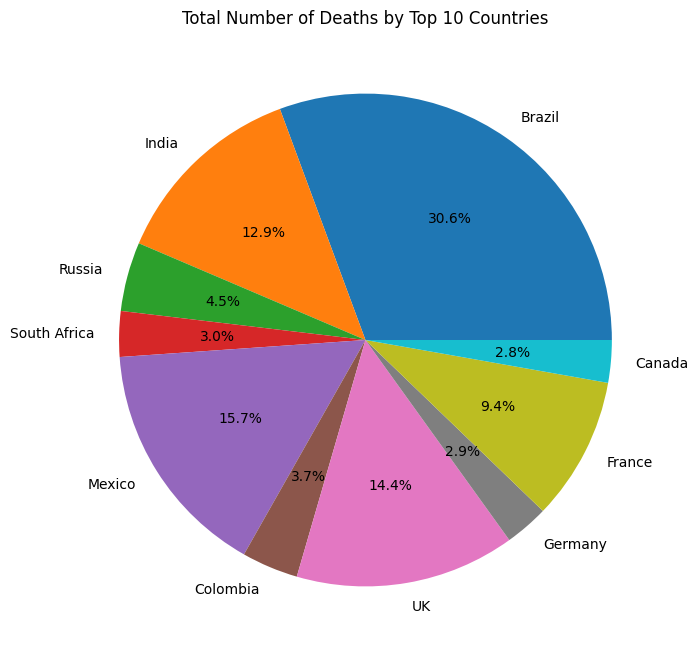

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(death_tot['TotalDeaths'], labels=death_tot['Country/Region'], autopct='%1.1f%%')
plt.title('Total Number of Deaths by Top 10 Countries')
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Covid - 19 Data Analysis/graph1.png')



*   **Brazil has the largest Deaths Rate and it has the highest death percentage of 30.6%.**
*   **Mexico and UK has similar deaths rate 15.7% and 14.4%.**
*   **Russia, South Africa, Colombia, and Canada having even smaller portions.**

*   **India also has a Death of 12.9%.**


### **4. Collecting the Deaths Cases Data of 20,000,000 Population**

In [ ]:
pop_data = data[data['Population'] < 20_000_000]
pop_data =pop_data[['Country/Region', 'TotalDeaths']]

In [ ]:
pop_data

,Country/Region,TotalDeaths
7,Chile,9889.0
24,Qatar,178.0
25,Kazakhstan,1058.0
27,Ecuador,5877.0
28,Bolivia,3465.0
...,...,...
204,Montserrat,1.0
205,Caribbean Netherlands,NaN
206,Falkland Islands,NaN
207,Vatican City,NaN


In [ ]:
pop_data = pop_data.dropna(subset=['TotalDeaths'])
pop_data

,Country/Region,TotalDeaths
7,Chile,9889.0
24,Qatar,178.0
25,Kazakhstan,1058.0
27,Ecuador,5877.0
28,Bolivia,3465.0
...,...,...
192,Saint Martin,3.0
194,Curaçao,1.0
195,Fiji,1.0
204,Montserrat,1.0


In [ ]:
top_countries = pop_data.nlargest(10, 'TotalDeaths')
top_countries

,Country/Region,TotalDeaths
7,Chile,9889.0
35,Belgium,9859.0
40,Netherlands,6153.0
27,Ecuador,5877.0
29,Sweden,5766.0
28,Bolivia,3465.0
39,Romania,2566.0
42,Guatemala,2119.0
53,Switzerland,1985.0
60,Ireland,1768.0


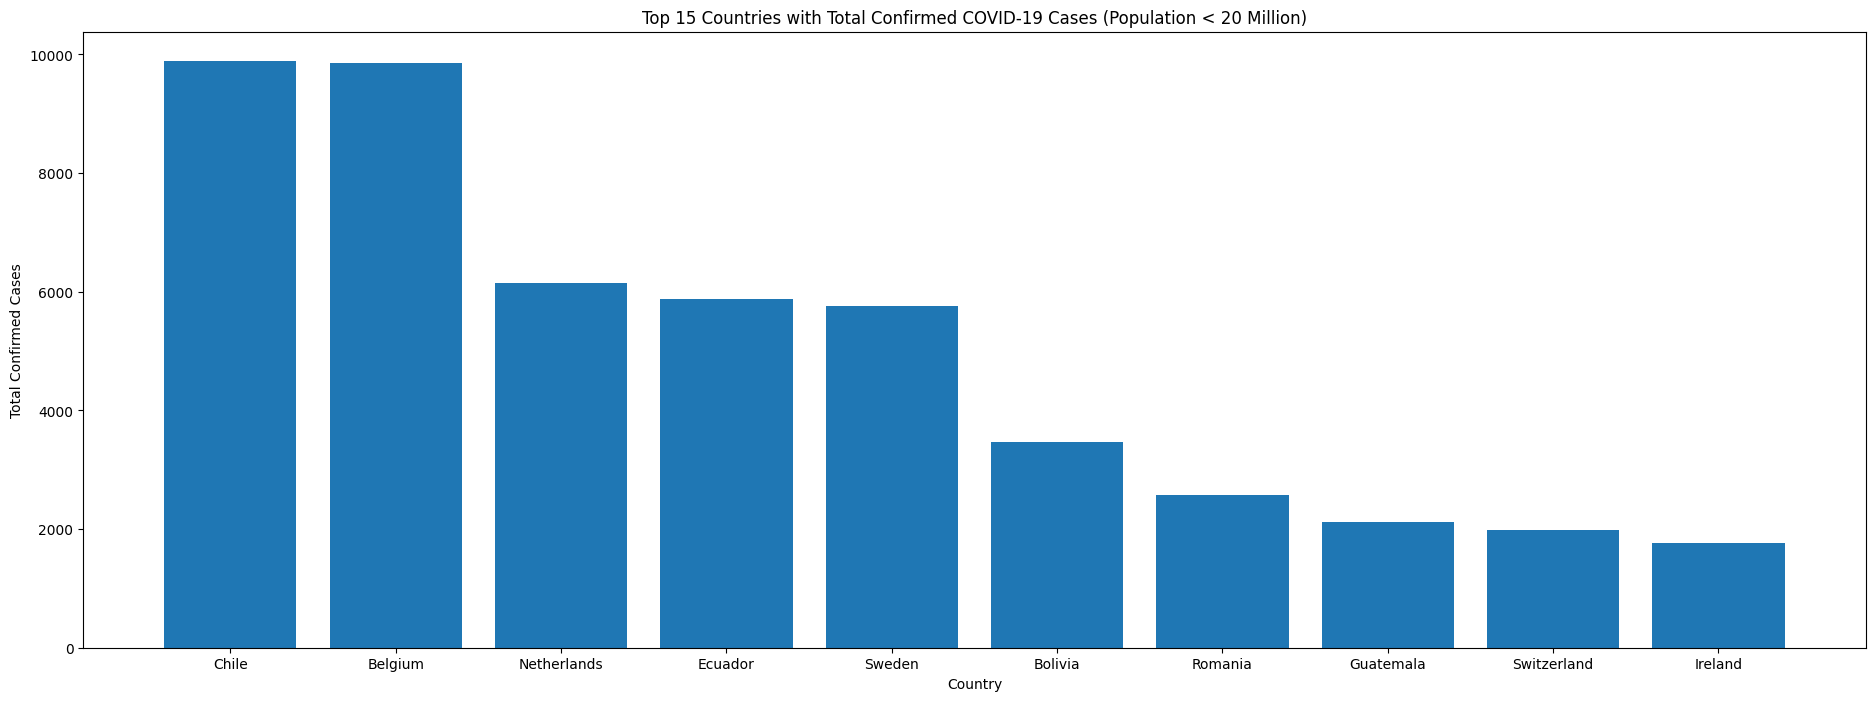

In [ ]:
plt.figure(figsize=(23,8))
plt.bar(top_countries['Country/Region'], top_countries['TotalDeaths'])
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.title('Top 15 Countries with Total Confirmed COVID-19 Cases (Population < 20 Million)')


### **For a Specific Country**
### **Number of them are Affected, Died and Recovered in India**

In [ ]:
data_India= data[data["Country/Region"] == "India"]

In [ ]:
data_India.head()

,Age Group,Country/Region,Continent,Population,Condition Group,Condition,ICD10_codes,Vaccination Relevant,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,Flag
2,35-44,India,Asia,1.381345e+09,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,NaN


In [ ]:
data.columns

Index(['Age Group', 'Country/Region', 'Continent', 'Population',
       'Condition Group', 'Condition', 'ICD10_codes', 'Vaccination Relevant',
       'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'WHO Region', 'iso_alpha', 'Flag'],
      dtype='object')

In [ ]:
age = data_India.groupby('Age Group')[['TotalCases', 'TotalDeaths', 'TotalRecovered']].sum().reset_index()

In [ ]:
age.head()

,Age Group,TotalCases,TotalDeaths,TotalRecovered
0,35-44,2025409,41638.0,1377384.0


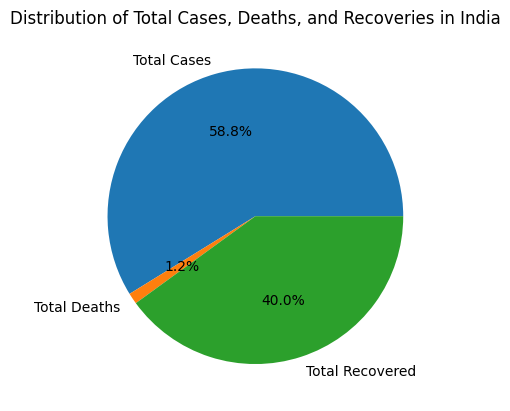

In [ ]:
sl = ['Total Cases', 'Total Deaths', 'Total Recovered']
val = [2025409, 41638, 1377384]
plt.pie(val, labels=sl,autopct='%.1f%%')
plt.title('Distribution of Total Cases, Deaths, and Recoveries in India')




*   **India has less no of deaths and has more no of confirmed case**
*   **Recovery rate is also quite lesser than the total case.**



In [ ]:
data.columns

Index(['Age Group', 'Country/Region', 'Continent', 'Population',
       'Condition Group', 'Condition', 'ICD10_codes', 'Vaccination Relevant',
       'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'WHO Region', 'iso_alpha', 'Flag'],
      dtype='object')


###**Causes of Death or Medical Conditions & Vaccination Relevant**

>**Vaccination Relevant - if the person is got relif from the diseases due to Covid Vaccine**


> ### **ICD-10 - International Classification of Diseases, Tenth Revision**



In [ ]:
cause_vaccine_data = data.groupby('Condition Group')[['Age Group','ICD10_codes','Condition','Vaccination Relevant']]

In [ ]:
cause_vaccine_data.head()

,Age Group,ICD10_codes,Condition,Vaccination Relevant
0,0-24,J09-J18,Influenza and pneumonia,Yes
1,25-34,J09-J18,Influenza and pneumonia,Yes
2,35-44,J09-J18,Influenza and pneumonia,Yes
3,45-54,J09-J18,Influenza and pneumonia,Yes
4,55-64,J09-J18,Influenza and pneumonia,No
42,35-44,I10-I15,Hypertensive diseases,No
43,45-54,I10-I15,Hypertensive diseases,No
44,55-64,I10-I15,Hypertensive diseases,No
45,65-74,I10-I15,Hypertensive diseases,No
46,75-84,I10-I15,Hypertensive diseases,No


> ### **Age Groups Benefiting from Vaccination**



In [ ]:
vaccine_yes_data = data[data['Vaccination Relevant'] == "Yes"]
vaccine_yes_data = vaccine_yes_data[['Age Group','Country/Region','Condition','Vaccination Relevant']]

In [ ]:
vaccine_yes_data.head(20)

,Age Group,Country/Region,Condition,Vaccination Relevant
0,0-24,USA,Influenza and pneumonia,Yes
1,25-34,Brazil,Influenza and pneumonia,Yes
2,35-44,India,Influenza and pneumonia,Yes
3,45-54,Russia,Influenza and pneumonia,Yes
8,Not stated,Colombia,Influenza and pneumonia,Yes
30,0-24,Oman,Respiratory failure,Yes
31,25-34,Israel,Respiratory failure,Yes
32,35-44,Ukraine,Respiratory failure,Yes
33,45-54,Dominican Republic,Respiratory failure,Yes
35,65-74,Belgium,Respiratory failure,Yes


In [ ]:
age_group_counts = vaccine_yes_data['Age Group'].value_counts()

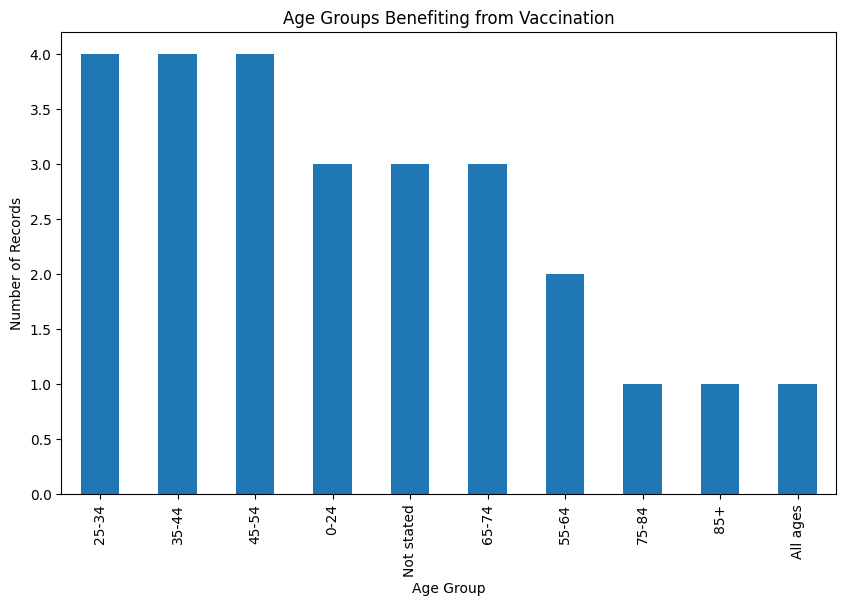

In [ ]:
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Age Groups Benefiting from Vaccination')
plt.xlabel('Age Group')
plt.ylabel('Number of Records')




*   **from the age 0 - 34 age people are getting the benefits through vaccination**

*   **85+ ages and 75 to 84 age people are having the less benefits**



> ### **Most Affected Conditions or Causes of death by COVID-19**



In [ ]:
condition_counts = data['Condition'].value_counts()

In [ ]:
condition_counts

Condition
Influenza and pneumonia                                                     20
Hypertensive diseases                                                       20
Chronic lower respiratory diseases                                          20
Malignant neoplasms                                                         18
Sepsis                                                                      14
Ischemic heart disease                                                      13
Diabetes                                                                    13
Adult respiratory distress syndrome                                         11
Alzheimer disease                                                           10
Cardiac arrest                                                              10
Intentional and unintentional injury, poisoning and other adverse events    10
Obesity                                                                     10
Respiratory failure                       

In [ ]:
counts_df = pd.DataFrame({'Condition': condition_counts.index,'Count': condition_counts.values})

In [ ]:
counts_df

,Condition,Count
0,Influenza and pneumonia,20
1,Hypertensive diseases,20
2,Chronic lower respiratory diseases,20
3,Malignant neoplasms,18
4,Sepsis,14
5,Ischemic heart disease,13
6,Diabetes,13
7,Adult respiratory distress syndrome,11
8,Alzheimer disease,10
9,Cardiac arrest,10


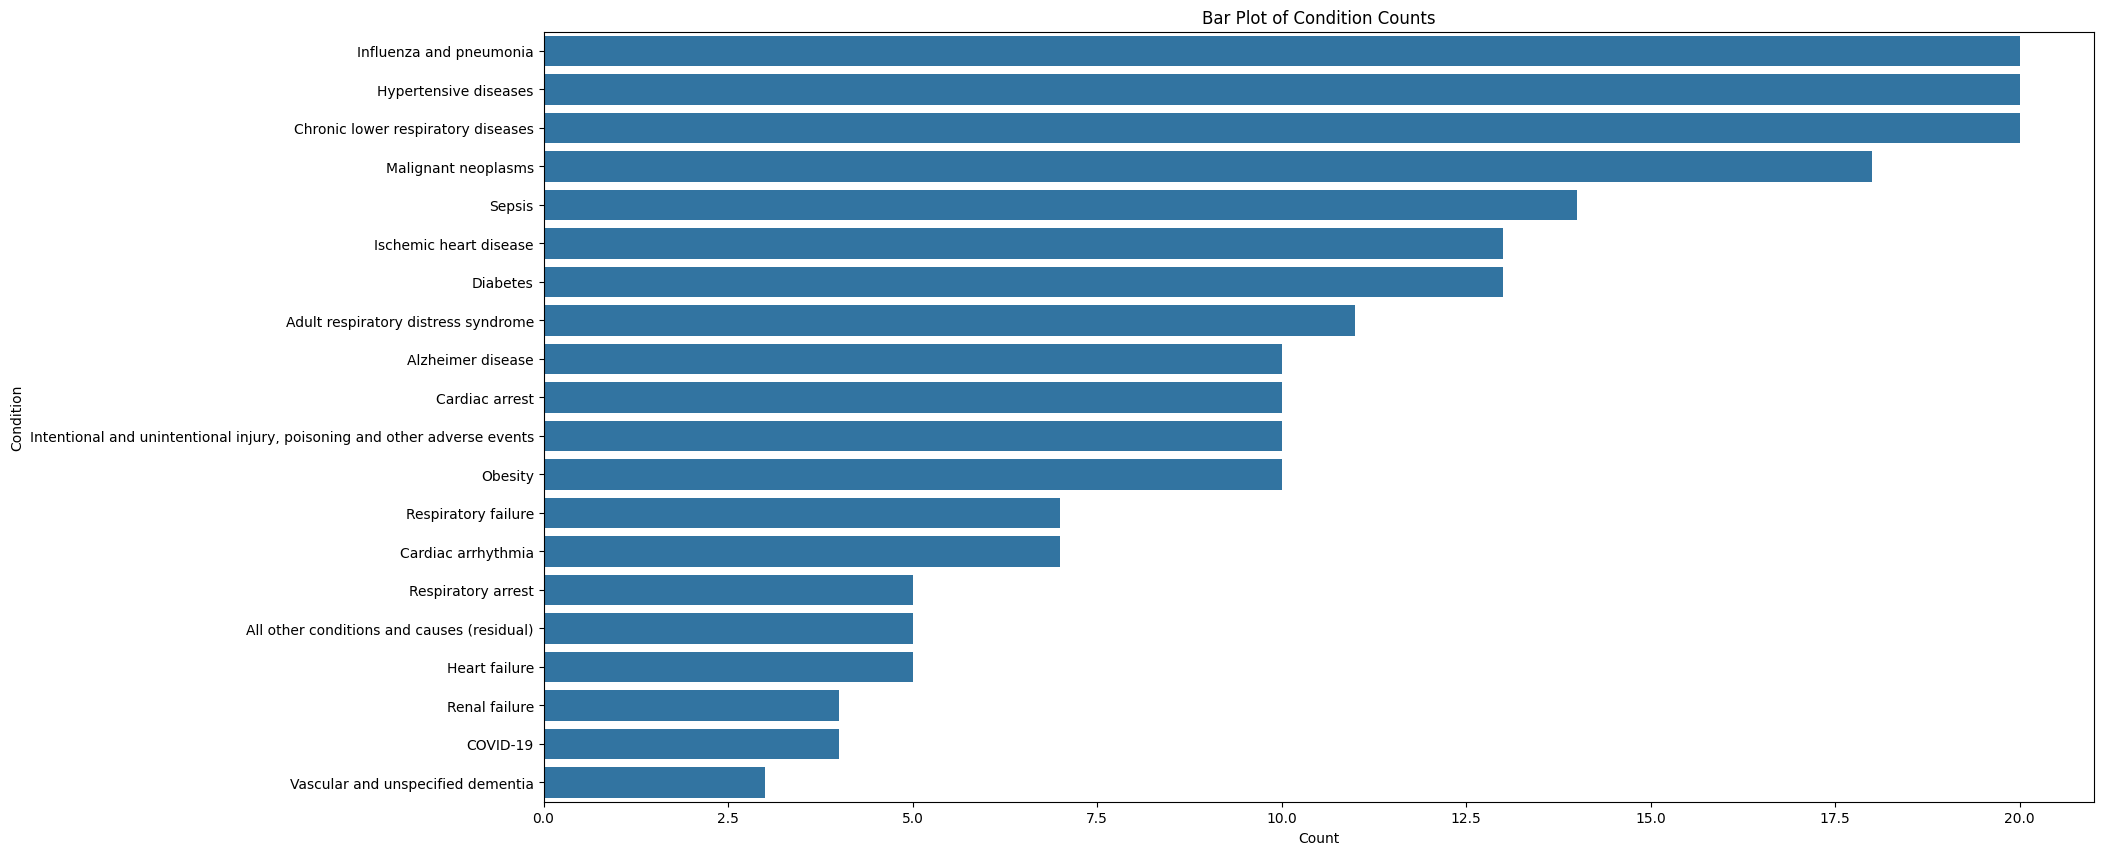

In [ ]:
plt.figure(figsize=(20, 10))


sns.barplot(x='Count', y='Condition', data=counts_df)


plt.title('Bar Plot of Condition Counts')
plt.xlabel('Count')
plt.ylabel('Condition')




*   **Influenza and pneumonia , Hypertensive diseases and Chronic lower respiratory diseases these has the more affected one over other diseases.**

*   **vacular and dementia has less affected.**


**Most Affected are Diseases : Influenza and pneumonia                                         , Hypertensive diseases and Chronic lower respiratory diseases**



In [ ]:
data.columns

Index(['Age Group', 'Country/Region', 'Continent', 'Population',
       'Condition Group', 'Condition', 'ICD10_codes', 'Vaccination Relevant',
       'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'WHO Region', 'iso_alpha', 'Flag'],
      dtype='object')

> ### **How many of them recovered or died in the most affected diseases**
> ### **Influenza and pneumonia, Hypertensive diseases, and Chronic lower respiratory diseases**



In [ ]:
Most_affected_data = ['Influenza and pneumonia', 'Hypertensive diseases', 'Chronic lower respiratory diseases']
affected_data = data[data['Condition'].isin(Most_affected_data)]

In [ ]:
died_recovered = affected_data[['TotalDeaths', 'TotalRecovered','TotalCases']].sum()
died_recovered.head()

TotalDeaths         623151.0
TotalRecovered    10290204.0
TotalCases        16441740.0
dtype: float64

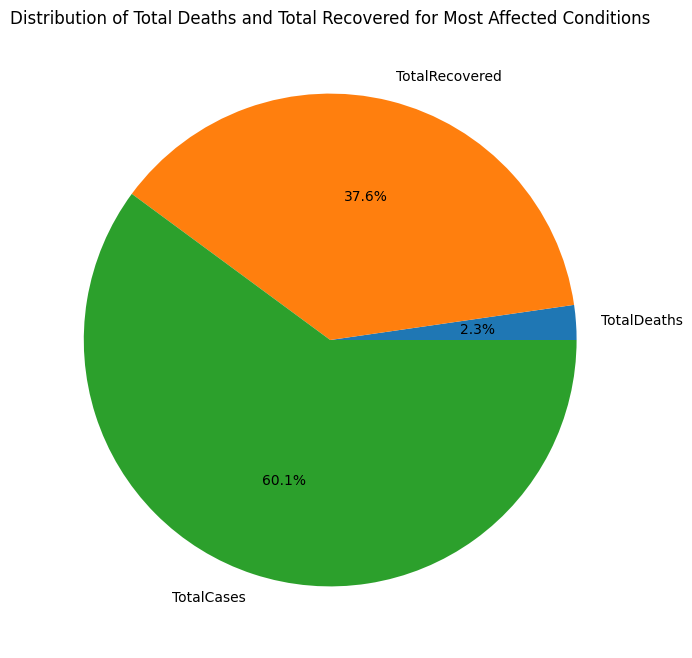

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(died_recovered, labels=died_recovered.index,autopct='%.1f%%')
plt.title('Distribution of Total Deaths and Total Recovered for Most Affected Conditions')
plt.show()



*   **from the Influenza and pneumonia, Hypertensive diseases, and Chronic lower respiratory diseases most affected diseases the death rate is less**

*  **Recovery rate is also seen that the 10,290,204 of cases were recovered**   
*   **Total cases were 16,441,740.0**






> ### **Active Cases and Critical Condition amoung the total population in India**

In [ ]:
india_set = data[data['Country/Region'] == 'India']

In [ ]:
india_set

,Age Group,Country/Region,Continent,Population,Condition Group,Condition,ICD10_codes,Vaccination Relevant,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,Flag
2,35-44,India,Asia,1.381345e+09,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,NaN


In [ ]:
pop_india = india_set['Population'].iloc[0]

In [ ]:
pop_india

1381344997.0

In [ ]:
critical_condition =india_set['Serious,Critical'].iloc[0]

In [ ]:
critical_condition

8944.0

In [ ]:
active_cases = india_set['ActiveCases'].iloc[0]

In [ ]:
active_cases

606387.0

In [ ]:
active = (active_cases / pop_india) * 100
critical = (critical_condition / pop_india) * 100

In [ ]:
print("Active Cases -- >" ,active_cases,"\n")
print("Active Cases Percentage",active,"%\n")
print("Critical Condition",critical_condition,"\n")
print("Critical Condition Precentage",critical,"%\n")

Active Cases -- > 606387.0 

Active Cases Percentage 0.043898302112575 %

Critical Condition 8944.0 

Critical Condition Precentage 0.0006474848802742651 %




> ### **Total Tests and Confirmed Cases**

> ### **In that How Many were died and recovered**






In [ ]:
total_tests = data['TotalTests'].sum()
total_confirmed = data['TotalCases'].sum()
total_deaths = data['TotalDeaths'].sum()
total_recovered = data['TotalRecovered'].sum()

In [ ]:
 total_tests

267859298.0

In [ ]:
 total_confirmed

19169166

In [ ]:
total_deaths

713007.0

In [ ]:
total_recovered

12070191.0

In [ ]:
death_percentage = (total_deaths / total_confirmed) * 100
print(f"Death Percentage of Confirmed Cases: {death_percentage:.2f}%")

Death Percentage of Confirmed Cases: 3.72%


In [ ]:
recovery_percentage = (total_recovered / total_confirmed) * 100
print(f"Recovery Percentage of Confirmed Cases: {recovery_percentage:.2f}%")

Recovery Percentage of Confirmed Cases: 62.97%


In [ ]:
fromconfired = ['ConfirmedCases', 'TotalDeaths', 'TotalRecovered']
xis = [total_confirmed, total_deaths, total_recovered]

In [ ]:
yaxis = ['TotalDeaths', 'TotalRecovered']
xaxis = [total_deaths, total_confirmed - total_deaths]

Text(0.5, 1.0, 'Death vs. Recovered')

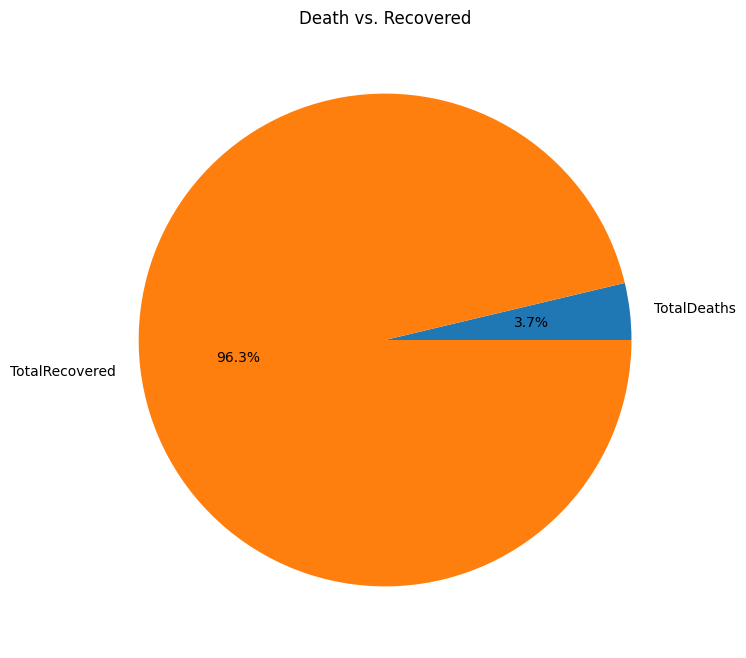

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels,autopct='%.1f%%')
plt.title('Death vs. Recovered')



*   **from the Total Tests and Confirmed Cases the recovery rate is high and death rate is low**

### **Tests Case from WHO Region**

In [ ]:
regional_test = data.groupby('WHO Region')[['WHO Region','TotalTests']]

In [ ]:
regional_test.head()

,WHO Region,TotalTests
0,Americas,63139605.0
1,Americas,13206188.0
2,South-EastAsia,22149351.0
3,Europe,29716907.0
4,Africa,3149807.0
5,Americas,1056915.0
6,Americas,2493429.0
7,Americas,1760615.0
9,Europe,7064329.0
10,EasternMediterranean,2612763.0


In [ ]:
regional_test = data.groupby('WHO Region')[['TotalTests']].sum()

In [ ]:
regional_test.head()

,TotalTests
WHO Region,
Africa,6856722.0
Americas,92420577.0
EasternMediterranean,19885783.0
Europe,108184582.0
South-EastAsia,26922262.0


### **Which Diseases is easily getting cured by the Vaccination**

In [ ]:
data.head()

,Age Group,Country/Region,Continent,Population,Condition Group,Condition,ICD10_codes,Vaccination Relevant,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,Flag
0,0-24,USA,North America,3.311981e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA,NaN
1,25-34,Brazil,South America,2.127107e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA,Counts less than 10 suppressed.
2,35-44,India,Asia,1.381345e+09,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,NaN
3,45-54,Russia,Europe,1.459409e+08,Respiratory diseases,Influenza and pneumonia,J09-J18,Yes,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS,Counts less than 10 suppressed.
4,55-64,South Africa,Africa,5.938157e+07,Respiratory diseases,Influenza and pneumonia,J09-J18,No,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF,Counts less than 10 suppressed.


In [ ]:
data.columns

Index(['Age Group', 'Country/Region', 'Continent', 'Population',
       'Condition Group', 'Condition', 'ICD10_codes', 'Vaccination Relevant',
       'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'WHO Region', 'iso_alpha', 'Flag'],
      dtype='object')

**Selecting the Vaccination & Condition Columns**

In [ ]:
condition_set = data[['Condition']]

In [ ]:
condition_set.head(20)

,Condition
0,Influenza and pneumonia
1,Influenza and pneumonia
2,Influenza and pneumonia
3,Influenza and pneumonia
4,Influenza and pneumonia
5,Influenza and pneumonia
6,Influenza and pneumonia
7,Influenza and pneumonia
8,Influenza and pneumonia
9,Influenza and pneumonia


In [ ]:
condition_set = data[['Vaccination Relevant']]

In [ ]:
condition_set.head(20)

,Vaccination Relevant
0,Yes
1,Yes
2,Yes
3,Yes
4,No
5,No
6,No
7,No
8,Yes
9,No


In [ ]:
condition_set_y = data[data['Vaccination Relevant'] == "Yes"]

In [ ]:
condition_ = condition_set_y[['Age Group','Condition','Vaccination Relevant']]

In [ ]:
condition_.head(20)

,Age Group,Condition,Vaccination Relevant
0,0-24,Influenza and pneumonia,Yes
1,25-34,Influenza and pneumonia,Yes
2,35-44,Influenza and pneumonia,Yes
3,45-54,Influenza and pneumonia,Yes
8,Not stated,Influenza and pneumonia,Yes
30,0-24,Respiratory failure,Yes
31,25-34,Respiratory failure,Yes
32,35-44,Respiratory failure,Yes
33,45-54,Respiratory failure,Yes
35,65-74,Respiratory failure,Yes


In [ ]:
c = condition_[['Condition']].value_counts()

In [ ]:
c

Condition                                 
Influenza and pneumonia                       6
Respiratory failure                           5
COVID-19                                      4
Sepsis                                        4
Cardiac arrest                                3
All other conditions and causes (residual)    2
Ischemic heart disease                        1
Malignant neoplasms                           1
Name: count, dtype: int64

**In this Which has the more Yes we Should get as result**
**And Cardiac arrest is less curable**

**Influenza and pneumonia is easily cured by the vaccination**

In [ ]:
data.columns

Index(['Age Group', 'Country/Region', 'Continent', 'Population',
       'Condition Group', 'Condition', 'ICD10_codes', 'Vaccination Relevant',
       'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'WHO Region', 'iso_alpha', 'Flag'],
      dtype='object')

### **Which Country has the High no of Cases and deaths**

In [ ]:
country_high = data[['Country/Region','TotalCases']]

In [ ]:
country_high.head(20)

,Country/Region,TotalCases
0,USA,5032179
1,Brazil,2917562
2,India,2025409
3,Russia,871894
4,South Africa,538184
5,Mexico,462690
6,Peru,455409
7,Chile,366671
8,Colombia,357710
9,Spain,354530


In [ ]:
country_high.sort_values('TotalCases',ascending=False)

,Country/Region,TotalCases
0,USA,5032179
1,Brazil,2917562
2,India,2025409
3,Russia,871894
4,South Africa,538184
...,...,...
204,Montserrat,13
205,Caribbean Netherlands,13
206,Falkland Islands,13
207,Vatican City,12


In [ ]:
country_high = data[['Country/Region','TotalDeaths']]

In [ ]:
country_high.head()

,Country/Region,TotalDeaths
0,USA,162804.0
1,Brazil,98644.0
2,India,41638.0
3,Russia,14606.0
4,South Africa,9604.0


In [ ]:
country_high.sort_values('TotalDeaths',ascending=False)

,Country/Region,TotalDeaths
0,USA,162804.0
1,Brazil,98644.0
5,Mexico,50517.0
11,UK,46413.0
2,India,41638.0
...,...,...
202,Saint Kitts and Nevis,NaN
203,Greenland,NaN
205,Caribbean Netherlands,NaN
206,Falkland Islands,NaN


**USA has the High no of Cases and Deaths**


> ### **Below 0 - 24 Age**

**In a Country, How Many of them got Recovered**




In [ ]:
Age_set = data[['Age Group', 'Country/Region', 'TotalDeaths','TotalCases','TotalRecovered']]

In [ ]:
Age_set.head(20)

,Age Group,Country/Region,TotalDeaths,TotalCases,TotalRecovered
0,0-24,USA,162804.0,5032179,2576668.0
1,25-34,Brazil,98644.0,2917562,2047660.0
2,35-44,India,41638.0,2025409,1377384.0
3,45-54,Russia,14606.0,871894,676357.0
4,55-64,South Africa,9604.0,538184,387316.0
5,65-74,Mexico,50517.0,462690,308848.0
6,75-84,Peru,20424.0,455409,310337.0
7,85+,Chile,9889.0,366671,340168.0
8,Not stated,Colombia,11939.0,357710,192355.0
9,All ages,Spain,28500.0,354530,NaN


In [ ]:
Age_border = Age_set[Age_set['Age Group'] == '0-24']

In [ ]:
Age_alone = Age_border[['Age Group','Country/Region', 'TotalDeaths','TotalCases','TotalRecovered']]
Age_alone.head(10)


,Age Group,Country/Region,TotalDeaths,TotalCases,TotalRecovered
0,0-24,USA,162804.0,5032179,2576668.0
10,0-24,Iran,17976.0,320117,277463.0
20,0-24,Iraq,5161.0,140603,101025.0
30,0-24,Oman,492.0,80713,70910.0
40,0-24,Netherlands,6153.0,56982,NaN
50,0-24,Ghana,199.0,39642,36384.0
60,0-24,Ireland,1768.0,26372,23364.0
70,0-24,Cameroon,391.0,17718,15320.0
80,0-24,Senegal,223.0,10715,7101.0
90,0-24,Zambia,199.0,7164,5786.0


In [ ]:
heatmap_data = Age_alone.pivot(index="Country/Region", columns="Age Group", values="TotalDeaths")


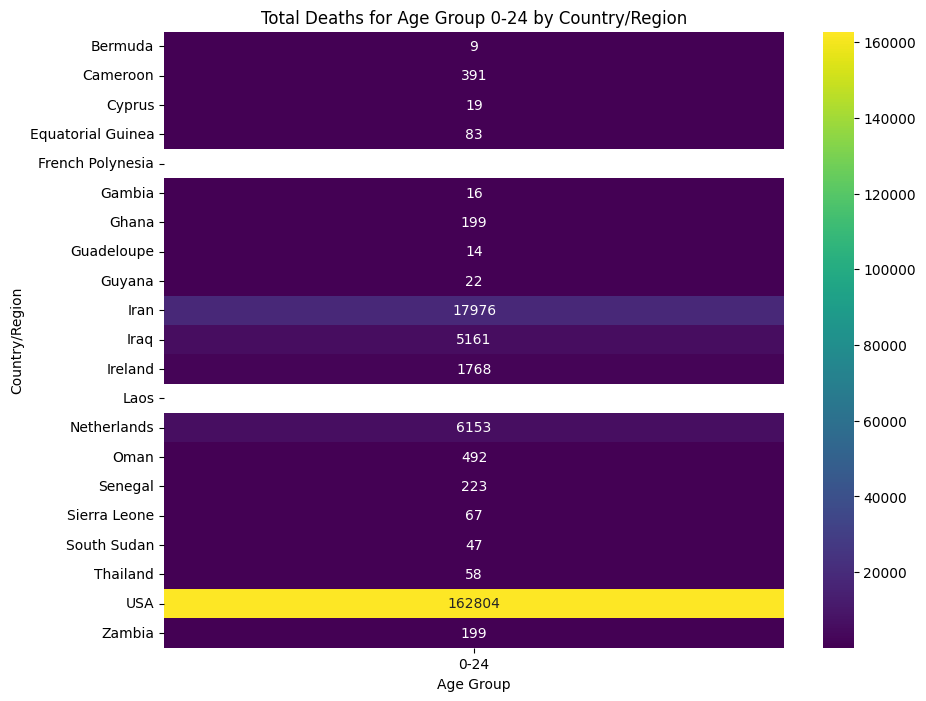

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar=True,fmt='.0f')
plt.title('Total Deaths for Age Group 0-24 by Country/Region')
plt.xlabel('Age Group')
plt.ylabel('Country/Region')
plt.show()



*   **USA has a high death in the 0 - 24 age groups and bermuda has less deaths compared to all**  


*   **Iran has a second high rate of deaths**


### **Average Deaths over the world**

In [ ]:
death_set = data[['Country/Region','Population','TotalDeaths']]

In [ ]:
death_set

,Country/Region,Population,TotalDeaths
0,USA,3.311981e+08,162804.0
1,Brazil,2.127107e+08,98644.0
2,India,1.381345e+09,41638.0
3,Russia,1.459409e+08,14606.0
4,South Africa,5.938157e+07,9604.0
...,...,...,...
204,Montserrat,4.992000e+03,1.0
205,Caribbean Netherlands,2.624700e+04,NaN
206,Falkland Islands,3.489000e+03,NaN
207,Vatican City,8.010000e+02,NaN


In [ ]:
average_deaths = death_set['TotalDeaths'].mean()

In [ ]:
average_deaths

3792.590425531915

**Average Deaths Over the World = 3792.59**

### **Less than one population country's Deaths, Confirmed Cases and Recovered Cases**

In [ ]:
only1 =  data[data['Population'] < 1000000]

In [ ]:
only1.head()

,Age Group,Country/Region,Continent,Population,Condition Group,Condition,ICD10_codes,Vaccination Relevant,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,Flag
84,55-64,French Guiana,South America,299385.0,Obesity,Obesity,E65-E68,No,8127,47.0,7240.0,840.0,23.0,27146.0,157.0,41412.0,138324.0,NaN,GUF,Counts less than 10 suppressed.
91,25-34,Luxembourg,Europe,626952.0,Alzheimer disease,Alzheimer disease,G30,No,7073,119.0,5750.0,1204.0,9.0,11282.0,190.0,623994.0,995282.0,Europe,LUX,Counts less than 10 suppressed.
97,85+,Djibouti,Africa,989387.0,Alzheimer disease,Alzheimer disease,G30,No,5330,59.0,5057.0,214.0,NaN,5387.0,60.0,59909.0,60552.0,EasternMediterranean,DJI,NaN
101,25-34,Maldives,Asia,541448.0,Renal failure,Renal failure,N17-N19,No,4680,19.0,2725.0,1936.0,12.0,8643.0,35.0,85587.0,158071.0,South-EastAsia,MDV,Counts less than 10 suppressed.
109,All ages,Montenegro,Europe,628074.0,"Intentional and unintentional injury, poisonin...","Intentional and unintentional injury, poisonin...","S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y...",No,3480,60.0,2178.0,1242.0,NaN,5541.0,96.0,38427.0,61182.0,Europe,MNE,NaN


In [ ]:
died_recv_conf = only1[['TotalDeaths','TotalCases','TotalRecovered']].sum()
died_recv_conf

TotalDeaths         733.0
TotalCases        48536.0
TotalRecovered    38354.0
dtype: float64

In [ ]:
total_deaths = 733.0
total_cases =  48536.0
total_recovered = 38354.0

In [ ]:
X_axis = [total_deaths, total_cases, total_recovered]
Y_axis = ['Total Deaths', 'Total Cases', 'Total Recovered']

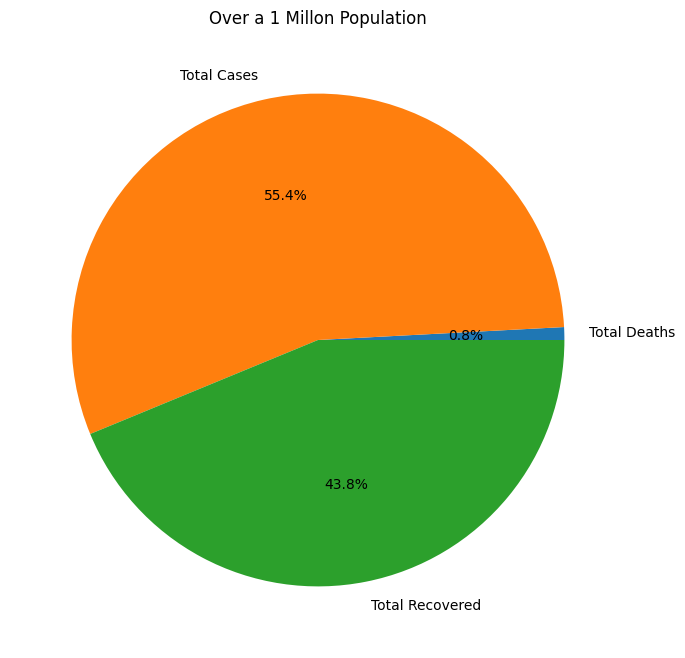

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(X_axis, labels=Y_axis,autopct='%.1f%%')
plt.title('Over a 1 Millon Population')
plt.show()

**1M Population death rate is low and has high no of confirmed case and has a recovery rate of 43.8 which is nearly half of the confirmed cases**